In [10]:
import os

import numpy as np
import pandas as pd

import cv2
from PIL import Image

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

In [11]:
img_dir = "../../DIP3E_Original_Images_CH04"
img = Image.open(f"{img_dir}/Fig0422(newspaper_shot_woman).tif")
img = np.asarray(img)

In [12]:
def bitwise_op(img, mask, op):
    h, w = img.shape
    img = img / 255
    res = np.zeros((h, w))
    for i in range(h):
        for j in range(w):
            if ((op == 'and') and (img[i][j] and mask[i][j])):
                res[i][j] = img[i][j]
            elif ((op == 'or') and (img[i][j] or mask[i][j])):
                if (mask[i][j] > img[i][j]):
                    res[i][j] = mask[i][j]
                else:
                    res[i][j] = img[i][j]
    return res

AND Mask: (831, 730)
OR Mask: (831, 730)


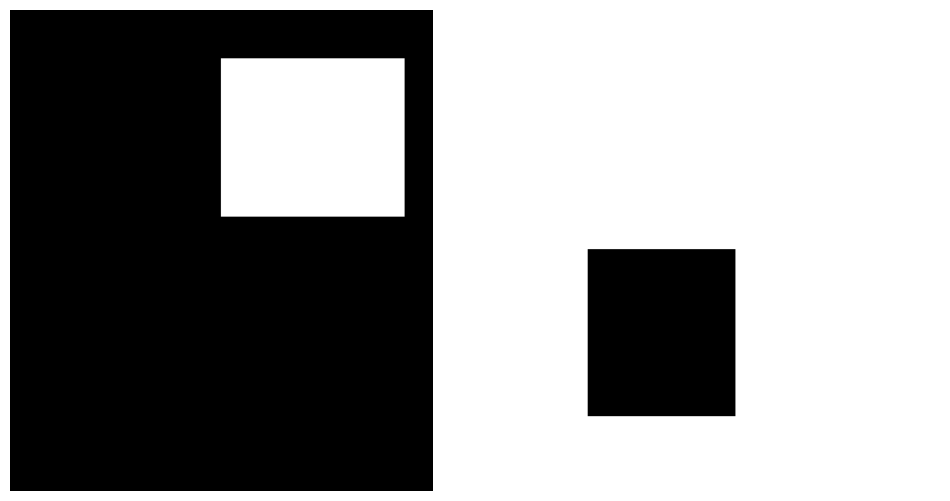

In [13]:
def transform_mask(img, mask, val):
    a = np.random.randint(img.shape[0]//2)
    b = a + np.random.randint(img.shape[0]//4, img.shape[0]//2)
    c = np.random.randint(img.shape[1]//2)
    d = c + np.random.randint(img.shape[0]//4, img.shape[1]//2)
    mask[a:b, c:d] = val

    return mask

mask_img_and = np.zeros(img.shape, dtype = 'uint8')
mask_img_or = np.ones(img.shape, dtype = 'uint8')

mask_img_and = transform_mask(img, mask_img_and, 1)
mask_img_or = transform_mask(img, mask_img_or, 0)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (12, 8))
ax1.imshow(mask_img_and, cmap = 'gray')
ax2.imshow(mask_img_or, cmap = 'gray')

ax1.axis('off')
ax2.axis('off');

print(f"AND Mask: {mask_img_and.shape}\nOR Mask: {mask_img_or.shape}")

In [14]:
img_and = bitwise_op(img, mask = mask_img_and, op = 'and')
img_or = bitwise_op(img, mask = mask_img_or, op = 'or')

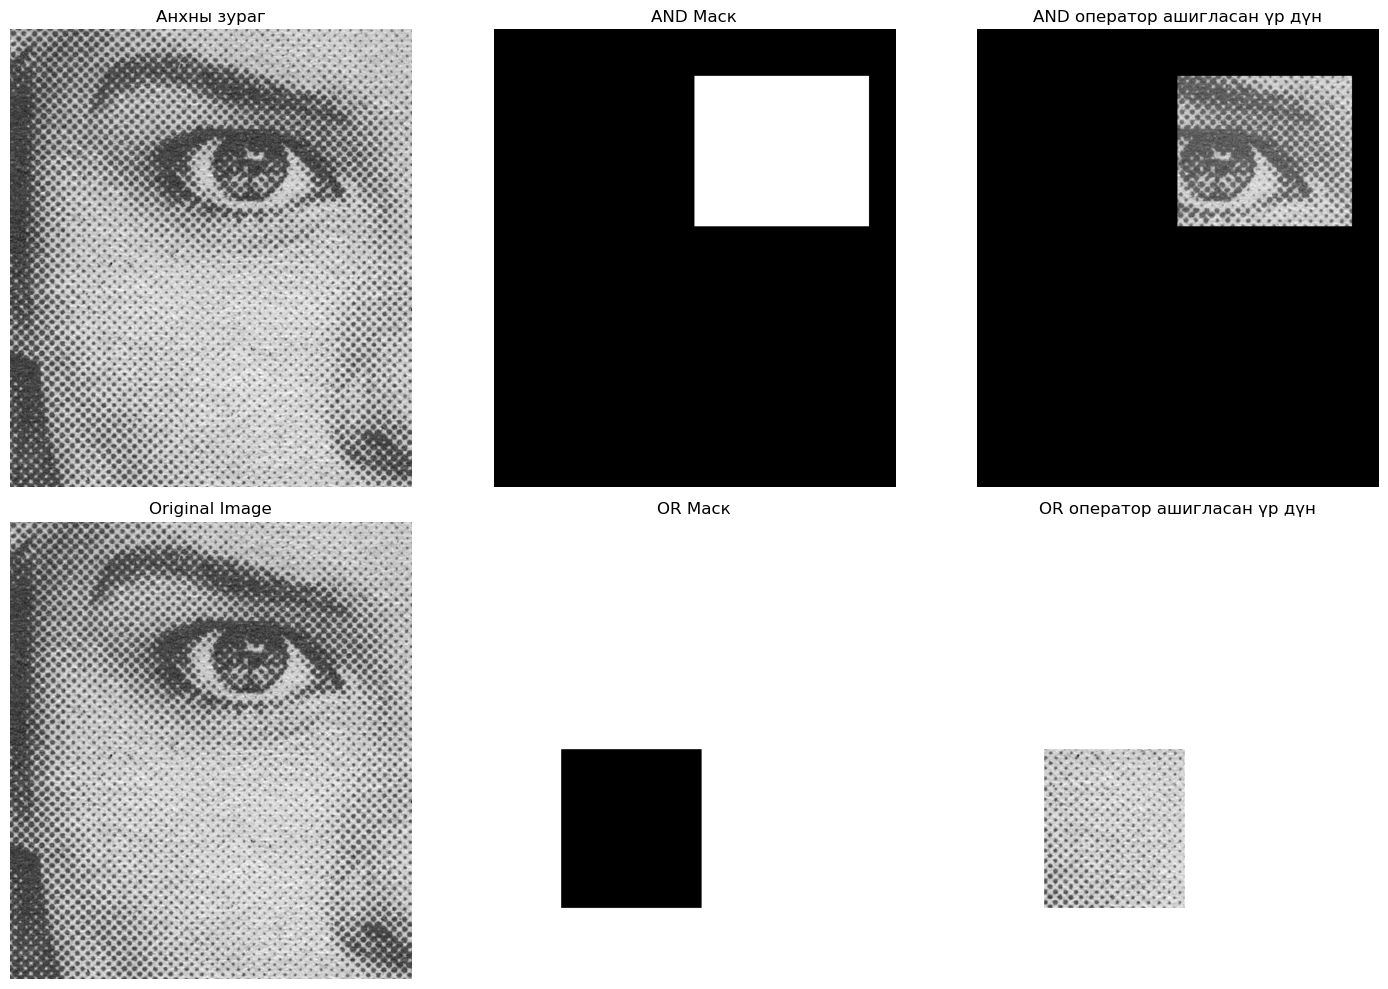

In [15]:
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Original image
axes[0, 0].imshow(img, cmap = 'gray')
axes[0, 0].set_title('Анхны зураг')
axes[0, 0].axis('off')

# AND image mask
axes[0, 1].imshow(mask_img_and, cmap = 'gray')
axes[0, 1].set_title('AND Маск')
axes[0, 1].axis('off')

# Result of the AND operation
axes[0, 2].imshow(img_and, cmap = 'gray')
axes[0, 2].set_title('AND оператор ашигласан үр дүн')
axes[0, 2].axis('off')

# Original image
axes[1, 0].imshow(img, cmap = 'gray')
axes[1, 0].set_title('Original Image')
axes[1, 0].axis('off')

# OR image mask
axes[1, 1].imshow(mask_img_or, cmap = 'gray')
axes[1, 1].set_title('OR Маск')
axes[1, 1].axis('off')

# Result of the OR operation
axes[1, 2].imshow(img_or, cmap = 'gray')
axes[1, 2].set_title('OR оператор ашигласан үр дүн')
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()
fig.savefig("./plots/enhancement_arithmetics_1.png", dpi = 300)

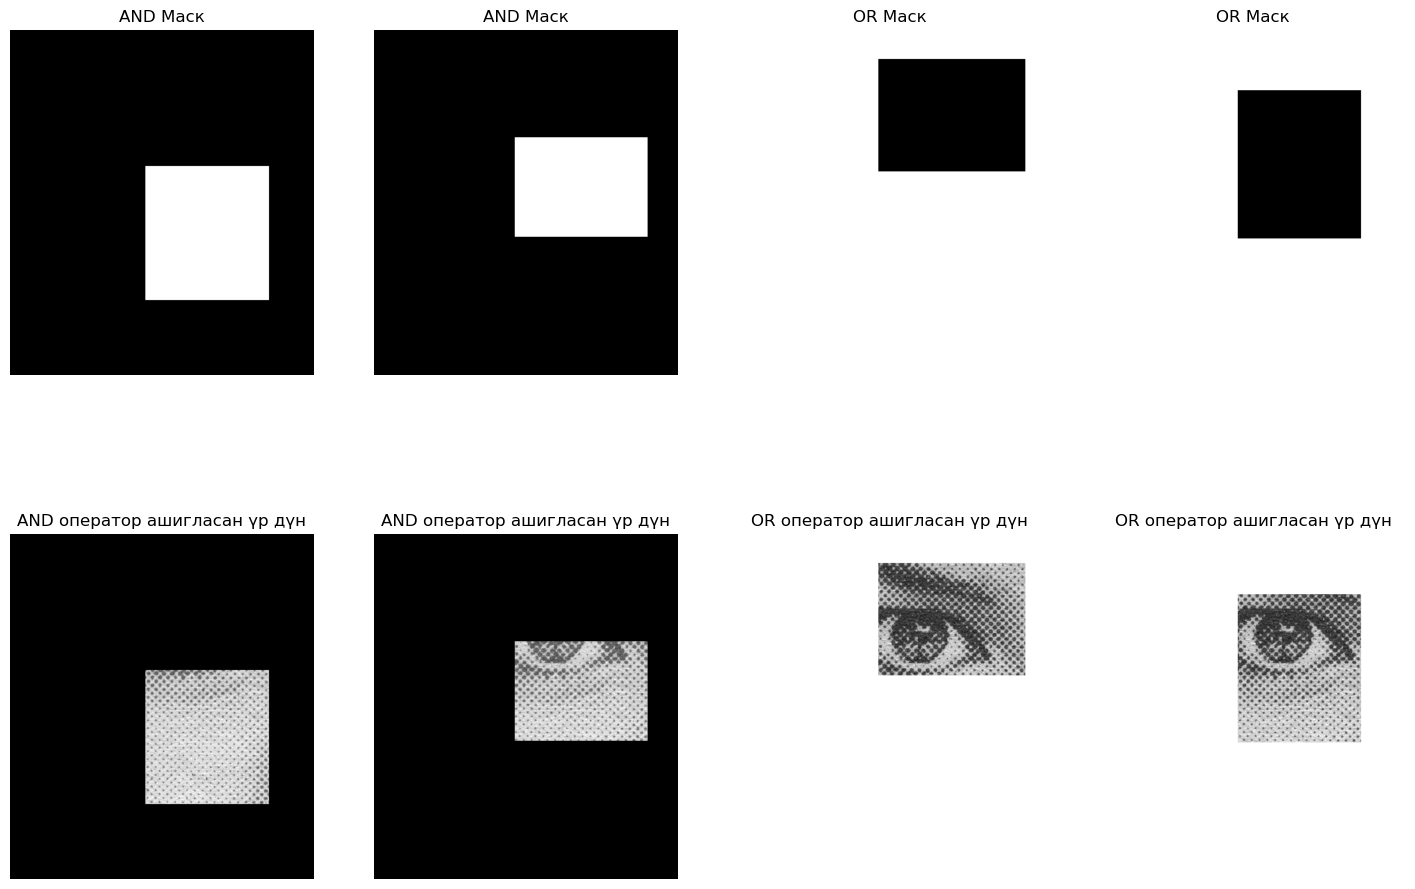

In [16]:
r, w = (2, 4)
fig, axes = plt.subplots(r, w, figsize = (18, 12))

for i in range(w):
    mask_img_and = np.zeros(img.shape, dtype = 'uint8')
    mask_img_or = np.ones(img.shape, dtype = 'uint8')
    
    mask_img_and = transform_mask(img, mask_img_and, 1)
    mask_img_or = transform_mask(img, mask_img_or, 0)

    img_and = bitwise_op(img, mask = mask_img_and, op = 'and')
    img_or = bitwise_op(img, mask = mask_img_or, op = 'or')

    if (i <= 1):
        axes[0, i].imshow(mask_img_and, cmap = 'gray')
        axes[0, i].set_title('AND Маск')
        axes[0, i].axis('off')

        axes[1, i].imshow(img_and, cmap = 'gray')
        axes[1, i].set_title('AND оператор ашигласан үр дүн')
        axes[1, i].axis('off')
    
    else:
        axes[0, i].imshow(mask_img_or, cmap = 'gray')
        axes[0, i].set_title('OR Маск')
        axes[0, i].axis('off')

        axes[1, i].imshow(img_or, cmap = 'gray')
        axes[1, i].set_title('OR оператор ашигласан үр дүн')
        axes[1, i].axis('off')

fig.savefig("./plots/enhancement_arithmetics_2.png", dpi = 300)